In [9]:
import numpy as np


input_matrix = np.random.randint(0, 10, (3)) # 3x3 matrix with random integers from 0 to 9
input_matrix

array([6, 1, 2])

In [10]:
weights = np.random.randint(0, 10, (10, 3)) # 3x3 matrix with random integers from 0 to 9
weights

array([[8, 6, 2],
       [0, 9, 5],
       [3, 7, 2],
       [4, 3, 5],
       [7, 4, 8],
       [9, 1, 0],
       [3, 8, 6],
       [3, 3, 8],
       [9, 8, 6],
       [4, 1, 4]])

In [11]:
out = weights @ input_matrix
out

array([58, 19, 29, 37, 62, 55, 38, 37, 74, 33])

In [12]:
np.linalg.lstsq(weights, out, rcond=None)

(array([6., 1., 2.]),
 array([1.2227344e-29]),
 3,
 array([27.68775274, 10.64994595,  7.61360621]))

In [13]:
A = weights[:, :3]
A

array([[8, 6, 2],
       [0, 9, 5],
       [3, 7, 2],
       [4, 3, 5],
       [7, 4, 8],
       [9, 1, 0],
       [3, 8, 6],
       [3, 3, 8],
       [9, 8, 6],
       [4, 1, 4]])

In [14]:
b = out[:3]
b

array([58, 19, 29])

In [15]:
b @ np.linalg.inv(A)

LinAlgError: Last 2 dimensions of the array must be square

In [ ]:
# input_1 * weights[0, 0] + input_2 * weights[0, 1] + input_3 * weights[0,2] =out[0]
# input_1 * weights[1, 0] + input_2 * weights[1, 1] + input_3 * weights[1,2] =out[1]
# input_1 * weights[2, 0] + input_2 * weights[2, 1] + input_3 * weights[2,2] =out[2]

In [ ]:
import torch
import torch.nn as nn

class RevLinear(nn.Module):
    def __init__(self, in_features, out_features, A=None, bias = True):
        super(RevLinear, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        if A is None:
            self.A = nn.Parameter(torch.rand(out_features, in_features))
            
        else:
            self.A = A.T
            
        if bias:
            self.bias = nn.Parameter(torch.zeros(out_features))
        else:
            self.bias = None

        
        
    def forward(self, x, inverse=False):
        if not inverse:
            x = x @ self.A.T
            print(x.shape)
            if self.bias is not None:
                x = x + self.bias
            return  x
        else:
            if self.bias is not None:
                x = x - self.bias
            x = torch.linalg.lstsq(self.A, x)[0]
            return x

input_size = 3

input_matrix = torch.rand(input_size)

print(input_matrix)

A = create_diff_matrix(input_size)

A = torch.cat([A, torch.ones(input_size,1)], dim=1)

print(A)

print(A.shape)

rv = RevLinear(input_size, A.shape[0], bias=False, A = A)

# rv = RevLinear(input_size, 20)

# rv2 = RevLinear(10, 10)



out = rv(input_matrix)
print(out)

# out = rv2(out)



out = rv(out, inverse=True)

print(out)

# torch.linalg.inv(A)


tensor([0.4587, 0.7028, 0.5364])
tensor([[ 1.,  1.,  0.,  1.],
        [-1.,  0.,  1.,  1.],
        [ 0., -1., -1.,  1.]])
torch.Size([3, 4])
torch.Size([4])
tensor([-0.2441, -0.0777,  0.1664,  1.6979])
tensor([0.4587, 0.7028, 0.5364])


In [ ]:
class RevLinear(nn.Module):
    def __init__(self, in_features, out_features, A=None, bias = True):
        super(RevLinear, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        if A is None:
            self.A = nn.Parameter(torch.rand( out_features, in_features))
            
        else:
            self.A = torch.tensor(A)
            
        if bias:
            self.bias = nn.Parameter(torch.zeros(out_features))
        else:
            self.bias = None

        
        
    def forward(self, x, inverse=False):

        if not inverse:
            x = x @ self.A.mT

            if self.bias is not None:
                x = x + self.bias
            return x
        else:
            if self.bias is not None:
                x = x - self.bias
            s = list(x.shape)
            A = self.A.repeat(np.prod(s[:-1]),1,1).reshape(s[:-1]+[self.out_features, self.in_features])
            x = torch.linalg.lstsq(A, x)[0]
            return x

b = 4

input_matrix = torch.rand((b,b,3), dtype=torch.float32)
print(input_matrix)

rv = RevLinear(3, 10, bias=True)

rv2 = RevLinear(10, 10)



out = rv(input_matrix)
print(out)

# out = rv2(out)

# print(out)


out = rv(out, inverse=True)

print(out)

In [ ]:
def create_diff_line(n, i, j):
    t = torch.zeros(n)
    t[i] = 1
    t[j] = -1
    return t

def create_diff_matrix(n):
    return torch.stack([create_diff_line(n, i, j) for i in range(n) for j in range(i+1, n)]).T

In [16]:
import torch
import torch.nn as nn

class RevLinear(nn.Module):
    def __init__(self, in_features, out_features, A=None, bias = True):
        super(RevLinear, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        
        
        if A is None:
            self.A = nn.Parameter(torch.rand(out_features, in_features).T)
            
        else:
            self.A = A
            
        if bias:
            self.bias = nn.Parameter(torch.zeros(out_features))
        else:
            self.bias = None
        
    def forward(self, x, inverse=False):

        if not inverse:
            x = x @ self.A

            if self.bias is not None:
                x = x + self.bias
            return x
        else:
            if self.bias is not None:
                x = x - self.bias   
            x = x @ torch.linalg.pinv(self.A)
            return x
    def create_diff_matrix(n):
        def create_diff_line(n, i, j):
            t = torch.zeros(n)
            t[i] = 1
            t[j] = -1
            return t
        diff_matrix =  torch.stack([create_diff_line(n, i, j) for i in range(n) for j in range(i+1, n)]).T
        
        diff_matrix = torch.cat([diff_matrix, torch.ones(n).reshape(-1,1)/n], dim=1)
        
        return diff_matrix
        


b = 4
input_size = 10


input_matrix = torch.randint(0, 10, (input_size,)).to(torch.float32)
# input_matrix = torch.randn(input_size).to(torch.float32)
print(input_matrix)

A = RevLinear.create_diff_matrix(input_size)

rv = RevLinear(input_size, A.shape[0], bias=False, A = A)

rv2 = RevLinear(10, 10)



out = rv(input_matrix)

print(out)

# out = rv2(out)

# print(out)


out = rv(out, inverse=True)

print((out-input_matrix).abs().mean())

print(out)




tensor([2., 5., 6., 0., 0., 0., 2., 2., 2., 4.])
tensor([-3.0000, -4.0000,  2.0000,  2.0000,  2.0000,  0.0000,  0.0000,  0.0000,
        -2.0000, -1.0000,  5.0000,  5.0000,  5.0000,  3.0000,  3.0000,  3.0000,
         1.0000,  6.0000,  6.0000,  6.0000,  4.0000,  4.0000,  4.0000,  2.0000,
         0.0000,  0.0000, -2.0000, -2.0000, -2.0000, -4.0000,  0.0000, -2.0000,
        -2.0000, -2.0000, -4.0000, -2.0000, -2.0000, -2.0000, -4.0000,  0.0000,
         0.0000, -2.0000,  0.0000, -2.0000, -2.0000,  2.3000])
tensor(2.3842e-07)
tensor([2.0000e+00, 5.0000e+00, 6.0000e+00, 2.3842e-07, 0.0000e+00, 4.7684e-07,
        2.0000e+00, 2.0000e+00, 2.0000e+00, 4.0000e+00])


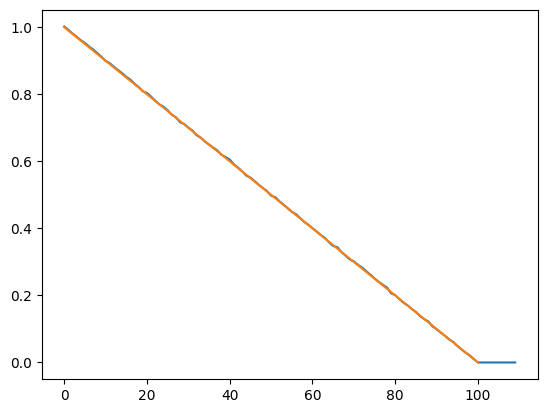

In [43]:
b = 4
input_size = 100

import matplotlib.pyplot as plt


input_matrix = torch.randn((1000, input_size)).to(torch.float32)
# input_matrix = torch.randn(input_size).to(torch.float32)

l = []

for k in range(110):
    
    rv = RevLinear(input_size, k, bias=False)
    
    out = rv(input_matrix)


    out = rv(out, inverse=True)
    
    l.append(((out-input_matrix).abs().square().mean()/input_matrix.std()).item())

    
plt.plot(l)
plt.plot([0, 100], [1, 0])

